# **🗃️ Data Lab**

Useful dataset: [Fruits dataset](https://drive.google.com/file/d/1Jn15Qra1NldKC6ELVTTFWrqZ5OJdK5pL/view?usp=sharing)

## Generate samples 🎯


Data shape: (500, 2) 



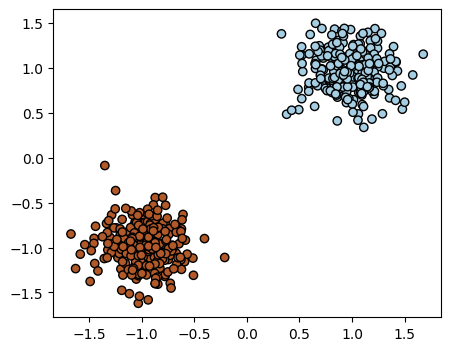

In [9]:
import time
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# @markdown \

# ============
# Parameters
# ============

n_samples = 500 # @param {type:"integer"}
type_dataset = "blobs" # @param ["noisy_circles", "noisy_moons", "blobs", "no_structure", "anisotropic", "varied_var"]
noise = 0.02 # @param {type:"slider", min:0, max:0.5, step:0.01}
angle_aniso = 100 # @param {type:"slider", min:0, max:180, step:10}
random_state = 1 # @param {type:"integer"}
num_classes = 2 # @param {type:"integer"}


# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============

if type_dataset == "noisy_circles":
  X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)

elif type_dataset == "noisy_moons":
  X, y = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)

elif type_dataset == "blobs":
  X, y = datasets.make_blobs(n_samples=n_samples, centers=num_classes, random_state=random_state)
  X += np.random.rand(n_samples, 2)*noise*X.min()

elif type_dataset == "anisotropic":
  X, y = datasets.make_blobs(n_samples=n_samples, centers=num_classes, random_state=random_state)
  t = np.tan(np.radians(angle_aniso))
  transformation = np.array(((1, t), (0, 1))).T
  X = np.dot(X, transformation)
  X += np.random.rand(n_samples, 2)*noise*X.min()

elif type_dataset == "varied_var":
  X, y = datasets.make_blobs(n_samples=n_samples, centers=num_classes, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
  X += np.random.rand(n_samples, 2)*noise*X.min()

X = StandardScaler().fit_transform(X)

_, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='Paired')

print ("\nData shape: {0} \n".format(X.shape))

## Load a dataset 📑

In [ ]:
# @markdown ---

# @markdown \
# @markdown ### 🔼 Upload your file (first)
# @markdown \

# @markdown ---
# @markdown ### Enter path to **.csv* file:
file_path = "/content/heart_disease_uci.csv" # @param {type:"string"}

var_h = "age" # @param {type:"string"}
var_v = "chol" # @param {type:"string"}
labels = "" # @param {type:"string"}
normalization = "None" # @param ["MinMax [0,1]", "MinMax [-1,1]", "Z-Score", "None"]
Load_all_data = True # @param {type:"boolean"}
Remove_missing = True # @param {type:"boolean"}

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv(file_path)

if Remove_missing:
  data = data.dropna()

if not Load_all_data:
  X = np.c_[np.array(data[var_h]), np.array(data[var_v])]
else:
  X = np.array(data)

y = np.array(data[labels]) if labels != "" else None

if   normalization == "MinMax [0,1]":
  X = MinMaxScaler().fit_transform(X)
elif normalization == "MinMax [-1,1]":
  X = MinMaxScaler(feature_range=(-1,1)).fit_transform(X)
elif normalization == "Z-Score":
  X = StandardScaler().fit_transform(X)


if not Load_all_data:
  data[var_h], data[var_v] = X[:, 0], X[:, 1]
else:
  for i in range(len(data.columns)):
    data.iloc[:, i] = X[:, i]




_, ax = plt.subplots (figsize=(5,4))
# ax.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired', edgecolors='k')
sns.scatterplot(ax=ax,data=data,x=var_h,y=var_v, hue=labels if labels != "" else None, palette='colorblind')
print ("\nData Loaded! ✅")
print (" - Shape: {0}\n".format(X.shape))

# **📋 Model Lab**

In [11]:
from sklearn import svm, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# @markdown \

model = "LogisticRegression" # @param ["LinearRegression", "LogisticRegression", "SVM (Linear)", "SVM (RBF)", "SVM (Polynomial)", "kNN"]

# @markdown ---
# @markdown \
# @markdown ### ✏️ Aditional Params
# @markdown \

C_svm = 1 # @param {type:"number"}
gamma_svm = 1 # @param {type:"number"}
degree_svm = 3 # @param {type:"integer"}
num_neighbors_knn = 3 # @param {type:"integer"}


X = StandardScaler().fit_transform(X)

if model == "LinearRegression":
  algo = linear_model.LinearRegression()

if model == "LinearRegression":
  algo = linear_model.LogisticRegression()

elif model == "SVM (Linear)":
  algo = svm.SVC(kernel='linear')

elif model == "SVM (RBF)":
  algo = svm.SVC(kernel='rbf', gamma=gamma_svm, C=C_svm)

elif model == "SVM (Polynomial)":
  algo = svm.SVC(kernel='poly', degree=degree_svm)

elif model == "kNN":
  algo = KNeighborsClassifier(n_neighbors=num_neighbors_knn)


print ("\nModel is ready!⚙️🔧\n")
# print ("----- ")
print (" - Model: {0}".format(model))
if model == "SVM (RBF)":
  print (" - gamma: {0}".format(gamma_svm))
  print (" - C: {0}".format(C_svm))
if model == "SVM (Polynomial)":
  print (" - degree: {0}".format(degree_svm))
if model == "kNN":
  print (" - Num neighbors: {0}".format(num_neighbors_knn))


Model is ready!⚙️🔧

 - Model: LogisticRegression


# **🤖 Run training!**

In [ ]:
from itertools import cycle, islice

# @markdown ### Start now 🦾
# @markdown \


algo.fit(X, y)
pred = algo.predict(X)

_, ax = plt.subplots(figsize=(5,4))
ax.set_title("{0}".format(model))

print ("\nTraining done! ✅")

colors = np.array(list(islice(cycle(["#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628", \
                                     "#984ea3", "#999999", "#e41a1c", "#dede00", "#000000"]), int(max(pred) + 1),)))

ax.scatter(X[:, 0], X[:, 1], c=colors[pred], edgecolors='k')
print ("Plots... \n")